Scikit learn is a library containing many machime learning algorithms.

It utilizes a generalized estimator API framework to calling the models

This means the way algorithms are imported fitted and used is uniform across all algorathims.

This allows the users to easily swap algrothims in and out test various approches.

1. sciket learn comes with many convenience tools, including train test split functions cross velidation tools and a variety of reporting metric functions.
2. These leaves Scikit learn as a "One Stop shop" for many of our machine learning needs 

# Philosophy of Scikit Learn 

1. Scikit learn's approach to model building focuses on applying models and performance  metrics.
2. This is a more pragmatic industry style approach rather than an academic approach of describing the model and its parameters.

# Linear Regression with Scikit learn

Data Setup and model traning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Advertising.csv")

In [3]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


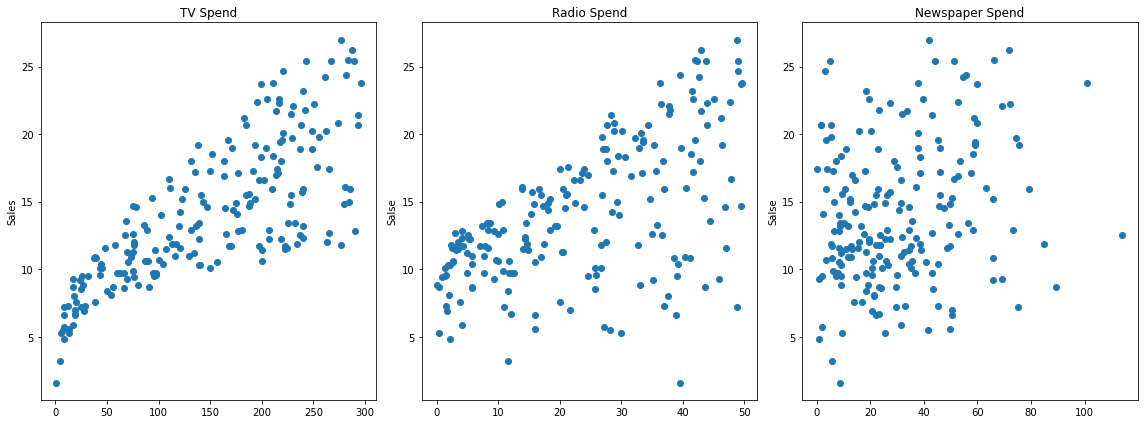

In [4]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize  =(16, 6))

axes[0].plot(df['TV'], df['sales'],'o')
axes[0].set_ylabel('Sales')
axes[0].set_title('TV Spend')

axes[1].plot(df['radio'], df['sales'], 'o')
axes[1].set_ylabel('Salse')
axes[1].set_title('Radio Spend')

axes[2].plot(df['newspaper'], df['sales'], 'o')
axes[2].set_ylabel('Salse')
axes[2].set_title('Newspaper Spend')

plt.tight_layout();

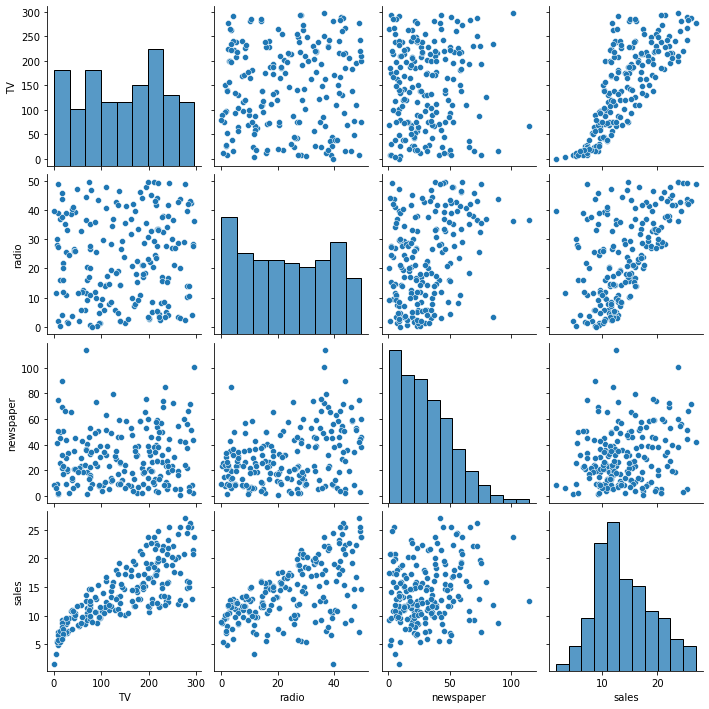

In [5]:
sns.pairplot(df)

In [6]:
X = df.drop('sales', axis = 1)

In [7]:
y = df['sales']

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33, random_state= 42)

In [10]:
from sklearn.linear_model import LinearRegression


In [11]:
model = LinearRegression()

In [12]:
model.fit(X_train, y_train)

LinearRegression()

In [13]:
pred = model.predict(X_test)

In [14]:
# Performance Evaluation : Regressin is a task when a model attempts to predict continous values.

In [15]:
# Most common evaluation metrics for regression:
# Mean absolute error
# Mean Squared error 
# Root mean square error

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [17]:
df['sales'].mean()

14.022500000000003

<AxesSubplot:xlabel='sales', ylabel='Count'>

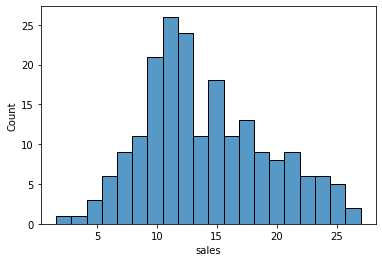

In [18]:
sns.histplot(data = df, x = 'sales', bins = 20)

In [19]:
mean_absolute_error(y_test, pred)

1.4937750024728964

In [20]:
mean_squared_error(y_test, pred)

3.727928330681506

In [21]:
np.sqrt(mean_squared_error(y_test, pred))

1.9307843822347193

# Residual Plots

In [22]:
# Evaluating Residuals

In [23]:
residuals = y_test-pred

In [25]:
# residuals

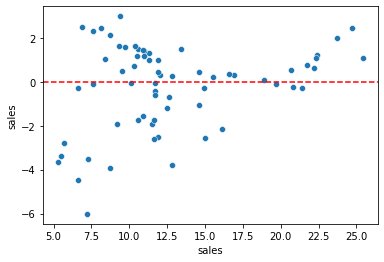

In [29]:
sns.scatterplot(x=y_test, y = residuals)
plt.axhline(y = 0, color = 'red', ls = '--')

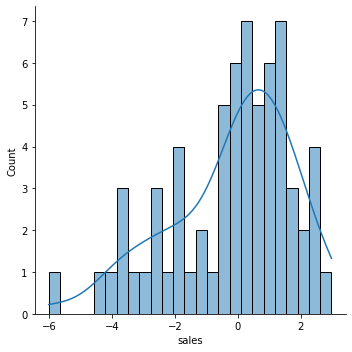

In [30]:
sns.displot(residuals, bins = 25, kde = True)

In [31]:
import scipy as sp

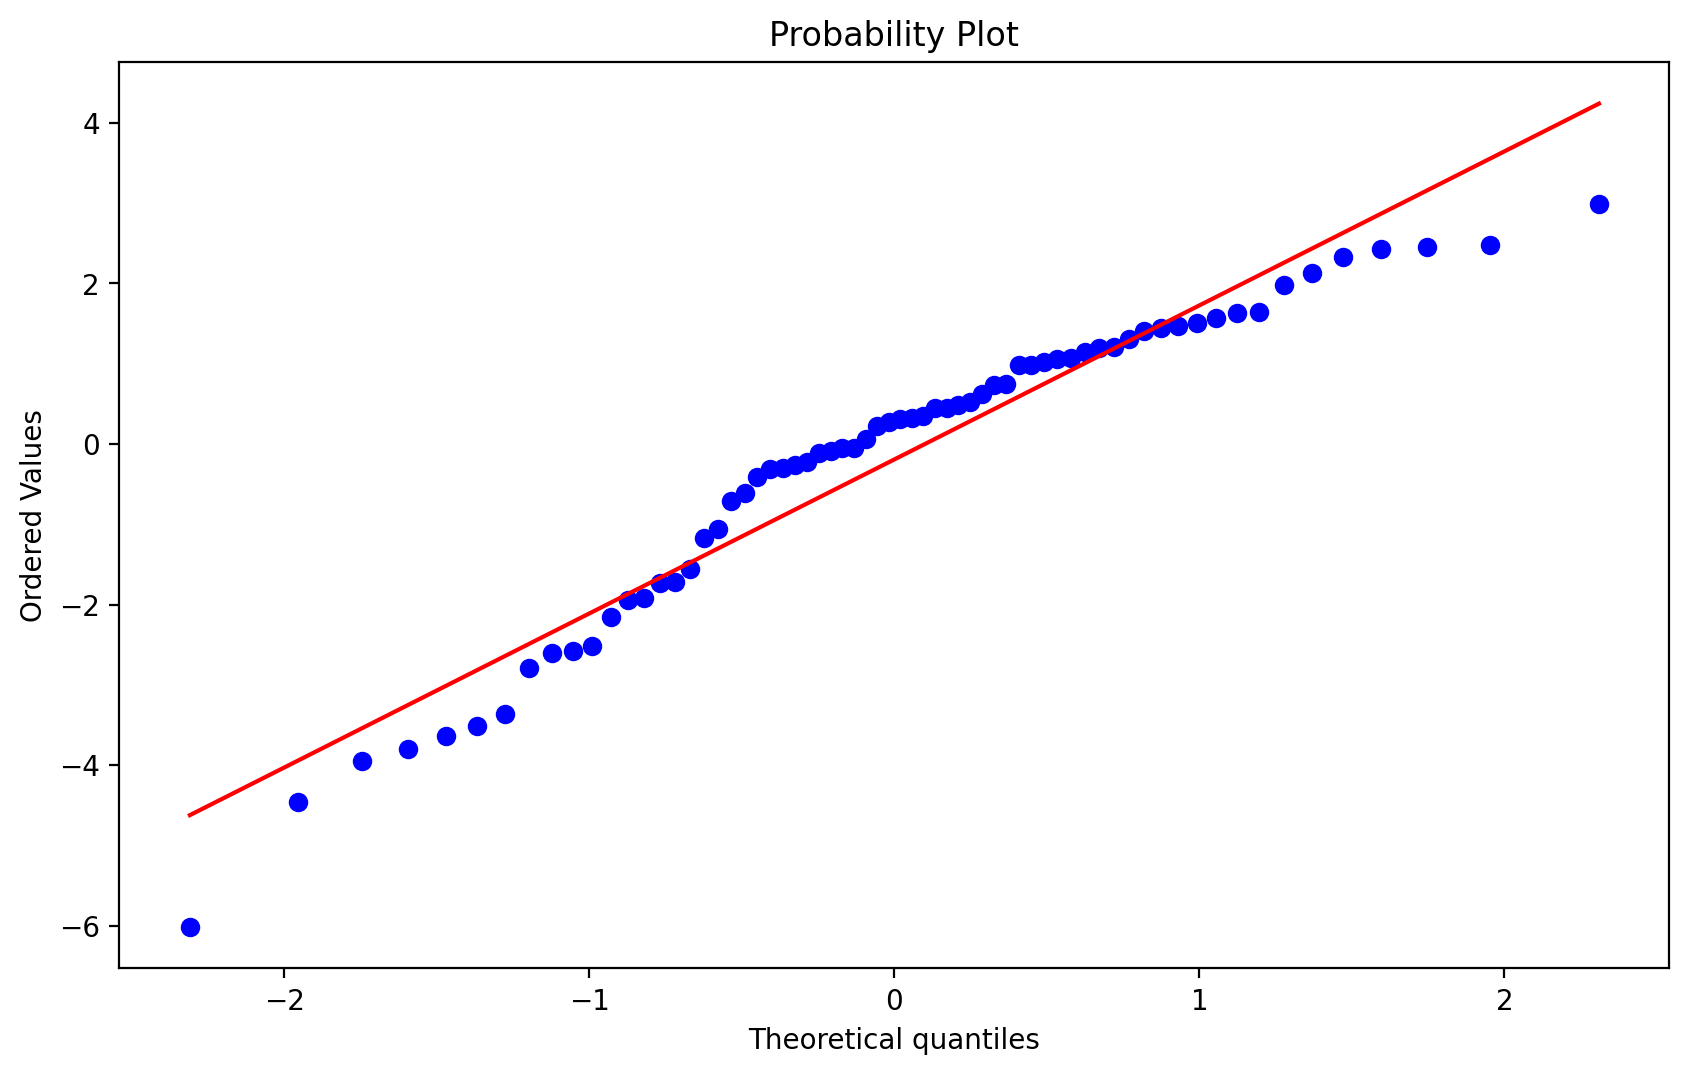

In [35]:
fig, ax =  plt.subplots(figsize = (10,6), dpi=200)
_ = sp.stats.probplot(residuals, plot = ax)

# Model Deployment and Cofficient Interchange

In [36]:
# Model Deployment

In [37]:
final_model = LinearRegression()

In [38]:
final_model.fit(X,y)

LinearRegression()

In [39]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [40]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [45]:
y_hat = final_model.predict(X)

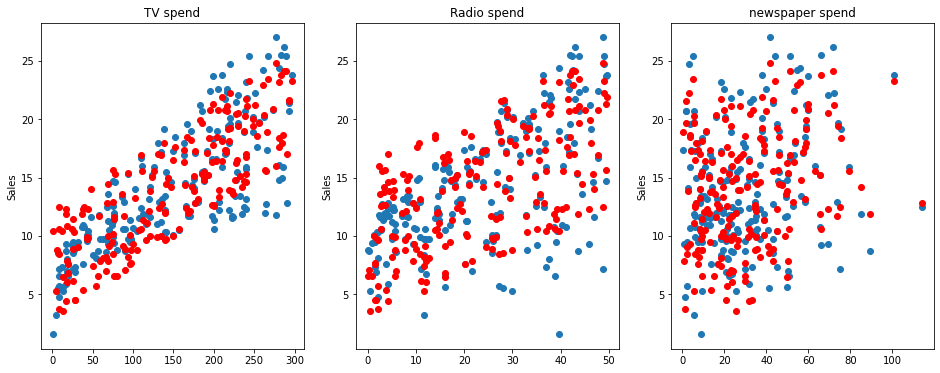

In [49]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16, 6))

axes[0].plot(df['TV'], df['sales'], 'o')
axes[0].plot(df['TV'], y_hat, 'o', color = 'red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV spend")

axes[1].plot(df['radio'], df['sales'], 'o')
axes[1].plot(df['radio'], y_hat, 'o', color = 'red')
axes[1].set_ylabel("Sales")
axes[1].set_title("Radio spend")

axes[2].plot(df['newspaper'], df['sales'], 'o')
axes[2].plot(df['newspaper'], y_hat, 'o', color = 'red')
axes[2].set_ylabel("Sales")
axes[2].set_title("newspaper spend");

In [50]:
from joblib import dump, load

In [51]:
dump(final_model, 'Final_sales_model.joblib')

['Final_sales_model.joblib']

In [52]:
loaded_model = load('Final_sales_model.joblib')

In [53]:
loaded_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

In [54]:
X.shape

(200, 3)

In [55]:
#149 TV, 22 Radio, 12 Newspaper
camp = [[149,22,12]]

In [57]:
loaded_model.predict(camp)

array([13.893032])